In [353]:
import SNIDsn
import SNIDdataset
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sn1994D = SNIDsn.SNIDsn()

In [319]:
sn1994D.loadSNIDlnw("Tutorial_Data/sn1994D.lnw")
sn1994D.restoreContinuum()
normalized = sn1994D.data_unflat
normalized[600]

array([0.84999092, 0.97366503, 0.71224984, 0.85133583, 1.02269809,
       0.77324348, 0.86113877, 0.57850815, 1.08543853, 0.88143753,
       0.8974901 , 0.88131595, 0.89854116, 1.05367681, 0.9739856 ,
       1.04141301, 0.65792413, 0.66020378, 0.78704796, 1.05203935,
       0.97517207, 1.19238386, 1.37309888, 1.78574886, 1.23044722,
       1.23440398, 1.07819133, 1.30609689, 0.98915347, 0.993532  ,
       0.86046191, 0.77095214, 0.82750497, 0.80238588, 0.54945915,
       0.46909768, 0.44592331, 0.42248524, 0.24855972])

In [371]:
with open("Tutorial_Data/sn1994D.lnw") as lnw:
    lines = lnw.readlines()
    lnw.close()
fmean_line = lines[1].strip()
fmean_items = header_line.split()
fmean_items.pop(0)
fmean_string = []
for i in range(len(fmean_items)):
    if i % 2 != 0:
        fmean_string.append(fmean_items[i])
fmean_log = []
for element in fmean_string:
    fmean_log.append(float(element))
fmean_lst = []
for element in fmean_log:
    fmean_lst.append(10 ** element)
count = 0
for fmean in fmean_lst:
    normalized[:, count] = normalized[:, count] * fmean
    count += 1
actual_data = normalized

In [199]:
wvl = sn1994D.wavelengths
phase1 = normalized[:, 0]

In [55]:
def find_endpoints(phase):
    l1 = -1 #placeholder index
    wvl_lst = []
    for i in range(len(phase)):
        if phase[i] != 0 and l1 == -1:
            l1 = i
        if phase[i] == 0 and l1 != -1:
            l2 = i - 1
    return l1, l2

find_endpoints(phase3)

(278, 1022)

In [309]:
def calc_knots(phase):
    nknot = 0
    kwidth = 1024 // 13
    nave = 0
    wave = 0
    fave = 0
    l1, l2 = find_endpoints(phase)
    xknot = []
    yknot = []
    for i in range(len(phase)):
        if i > l1 and i < l2:
            nave += 1
            wave += i - 0.5
            fave += phase[i]
        if i % kwidth == 0:
            if nave > 0 and fave > 0:
                nknot += 1
                xknot.append(np.log10(wave / nave))
                yknot.append(np.log10(fave / nave))
            nave = 0
            wave = 0
            fave = 0
    return xknot

In [344]:
xknots = []
for i in range(39):
    phase_knots = calc_knots(actual_data[:, i])
    xknots.append(phase_knots)
knots = []
for phase in xknots:
    for i in range(len(phase)):
        if phase[i] != 0:
            knots.append(phase[i])
knots.sort()
knots

[2.1861083798132053,
 2.1861083798132053,
 2.187520720836463,
 2.290034611362518,
 2.290034611362518,
 2.290034611362518,
 2.3394514413064407,
 2.3443922736851106,
 2.3453737305590883,
 2.357934847000454,
 2.3654879848909,
 2.436162647040756,
 2.436162647040756,
 2.436162647040756,
 2.436162647040756,
 2.436162647040756,
 2.436162647040756,
 2.436162647040756,
 2.436162647040756,
 2.469822015978163,
 2.469822015978163,
 2.4712917110589387,
 2.4712917110589387,
 2.47928731647617,
 2.48572142648158,
 2.48572142648158,
 2.48572142648158,
 2.48572142648158,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.486430478854434,
 2.4871383754771865,
 2.4871383754771865,
 2.4885507165004443,
 2.4892551683692603,
 2.4913616938342726,
 2.4927603890268375,
 2.4927603890268375,
 2.5453071164

In [345]:
np.set_printoptions(threshold=np.inf)
continuum = sn1994D.continuum.tolist()
continuum.pop(0)
xknot_zeroes = []
for phase in continuum:
    xknot_zeroes.append(phase[1::2])
real_knots = []
for phase in xknot_zeroes:
    for i in range(len(phase)):
        if phase[i] != 0:
            real_knots.append(phase[i])
real_knots.sort()
real_knots

[2.179,
 2.1804,
 2.1833,
 2.29,
 2.29,
 2.29,
 2.3075,
 2.3181,
 2.3212,
 2.3473,
 2.3627,
 2.4362,
 2.4362,
 2.4362,
 2.4362,
 2.4362,
 2.4362,
 2.4362,
 2.4362,
 2.4448,
 2.4456,
 2.4472,
 2.4472,
 2.4639,
 2.4778,
 2.4778,
 2.4778,
 2.4778,
 2.4786,
 2.4786,
 2.4786,
 2.4786,
 2.4786,
 2.4786,
 2.4786,
 2.4786,
 2.4786,
 2.4786,
 2.4786,
 2.4786,
 2.4793,
 2.4793,
 2.4807,
 2.4807,
 2.4836,
 2.4843,
 2.4886,
 2.4914,
 2.4921,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5453,
 2.5515,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,
 2.6325,

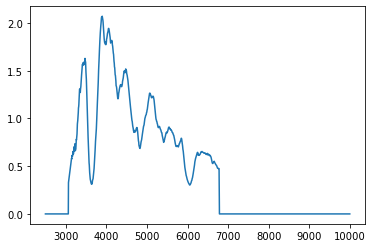

In [112]:
plt.plot(wvl, phase1)

In [346]:
difference = []
for i in range(len(knots)):
    distance = np.abs(knots[i] - real_knots[i])
    difference.append(distance)
difference

[0.007108379813205445,
 0.0057083798132051555,
 0.004220720836463077,
 3.461136251781127e-05,
 3.461136251781127e-05,
 3.461136251781127e-05,
 0.031951441306440564,
 0.02629227368511078,
 0.024173730559088114,
 0.010634847000453806,
 0.0027879848909000415,
 3.735295924389703e-05,
 3.735295924389703e-05,
 3.735295924389703e-05,
 3.735295924389703e-05,
 3.735295924389703e-05,
 3.735295924389703e-05,
 3.735295924389703e-05,
 3.735295924389703e-05,
 0.025022015978163115,
 0.02422201597816276,
 0.024091711058938703,
 0.024091711058938703,
 0.015387316476169755,
 0.00792142648158034,
 0.00792142648158034,
 0.00792142648158034,
 0.00792142648158034,
 0.007830478854433665,
 0.007830478854433665,
 0.007830478854433665,
 0.007830478854433665,
 0.007830478854433665,
 0.007830478854433665,
 0.007830478854433665,
 0.007830478854433665,
 0.007830478854433665,
 0.007830478854433665,
 0.007830478854433665,
 0.007830478854433665,
 0.007130478854433964,
 0.007130478854433964,
 0.006438375477186398,
 0.0

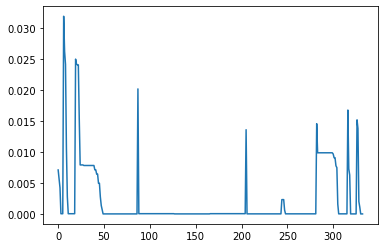

In [347]:
plt.plot(difference)

In [348]:
sn1994D.wavelengths

array([2501.69, 2505.08, 2508.48, 2511.87, 2515.28, 2518.69, 2522.1 ,
       2525.51, 2528.94, 2532.36, 2535.79, 2539.23, 2542.67, 2546.11,
       2549.56, 2553.01, 2556.47, 2559.94, 2563.4 , 2566.88, 2570.35,
       2573.84, 2577.32, 2580.82, 2584.31, 2587.81, 2591.32, 2594.83,
       2598.34, 2601.86, 2605.39, 2608.92, 2612.45, 2615.99, 2619.54,
       2623.08, 2626.64, 2630.2 , 2633.76, 2637.33, 2640.9 , 2644.48,
       2648.06, 2651.65, 2655.24, 2658.84, 2662.44, 2666.05, 2669.66,
       2673.27, 2676.9 , 2680.52, 2684.15, 2687.79, 2691.43, 2695.08,
       2698.73, 2702.38, 2706.05, 2709.71, 2713.38, 2717.06, 2720.74,
       2724.43, 2728.12, 2731.81, 2735.51, 2739.22, 2742.93, 2746.65,
       2750.37, 2754.09, 2757.82, 2761.56, 2765.3 , 2769.05, 2772.8 ,
       2776.55, 2780.32, 2784.08, 2787.85, 2791.63, 2795.41, 2799.2 ,
       2802.99, 2806.79, 2810.59, 2814.4 , 2818.21, 2822.03, 2825.85,
       2829.68, 2833.51, 2837.35, 2841.2 , 2845.05, 2848.9 , 2852.76,
       2856.62, 2860

In [356]:
def convert_xknot_wvl(xknot, nw, wvl):
    pix = np.arange(nw)+1
    wave = np.interp(xknot,pix,wvl)
    return wave

In [358]:
def calc_wvl(xknot):
    wvl = []
    for knot in xknot:
        wavelength = convert_xknot_wvl(knot, 1024, sn1994D.wavelengths)
        wvl.append(wavelength)
    return wvl

In [368]:
wvl = calc_wvl(knots)
wvl_real = calc_wvl(real_knots)
wvl

[2505.712768491365,
 2505.712768491365,
 2505.717570450844,
 2506.0661176786325,
 2506.0661176786325,
 2506.0661176786325,
 2506.234134900442,
 2506.250933730529,
 2506.254270683901,
 2506.2969784798015,
 2506.322659148629,
 2506.5629529999387,
 2506.5629529999387,
 2506.5629529999387,
 2506.5629529999387,
 2506.5629529999387,
 2506.5629529999387,
 2506.5629529999387,
 2506.5629529999387,
 2506.677394854326,
 2506.677394854326,
 2506.6823918176005,
 2506.6823918176005,
 2506.709576876019,
 2506.7314528500374,
 2506.7314528500374,
 2506.7314528500374,
 2506.7314528500374,
 2506.733863628105,
 2506.733863628105,
 2506.733863628105,
 2506.733863628105,
 2506.733863628105,
 2506.733863628105,
 2506.733863628105,
 2506.733863628105,
 2506.733863628105,
 2506.733863628105,
 2506.733863628105,
 2506.733863628105,
 2506.733863628105,
 2506.733863628105,
 2506.7362704766224,
 2506.7362704766224,
 2506.7410724361016,
 2506.7434675724553,
 2506.7506297590367,
 2506.7553853226914,
 2506.7553853226

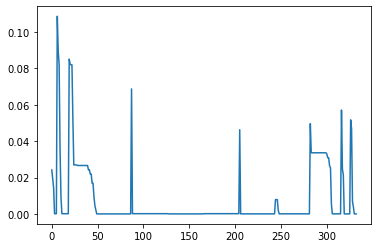

In [364]:
wvl_difference = []
for i in range(len(wvl)):
    wvl_distance = np.abs(wvl[i] - wvl_real[i])
    wvl_difference.append(wvl_distance)
plt.plot(wvl_difference)